In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/EU_Green/Catalonia'
os.chdir(folder_path)


Mounted at /content/drive


In [2]:
import os
import requests
from zipfile import ZipFile
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc

In [3]:
df = pd.read_csv('EPC_Catalonia.csv')


### Frequency Counting

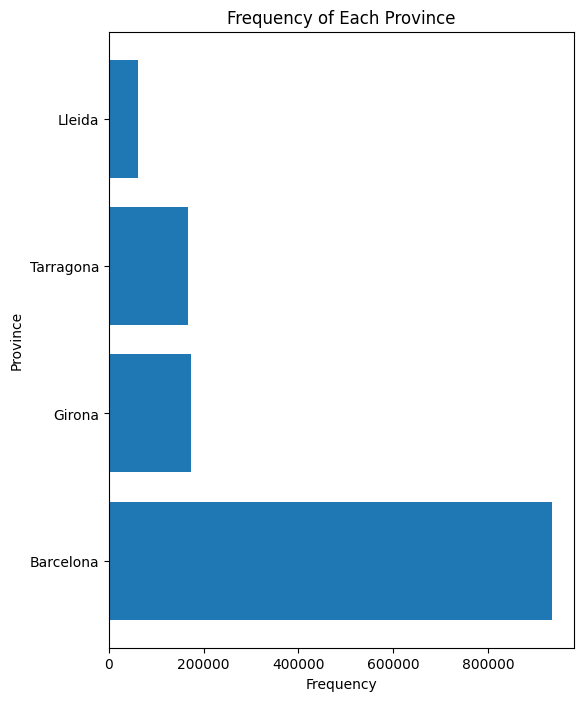

In [5]:
county_counts = df['NOM_PROVINCIA'].value_counts()
plt.figure(figsize=(6,8))
plt.barh(county_counts.index, county_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Province')
plt.title('Frequency of Each Province')
plt.show()

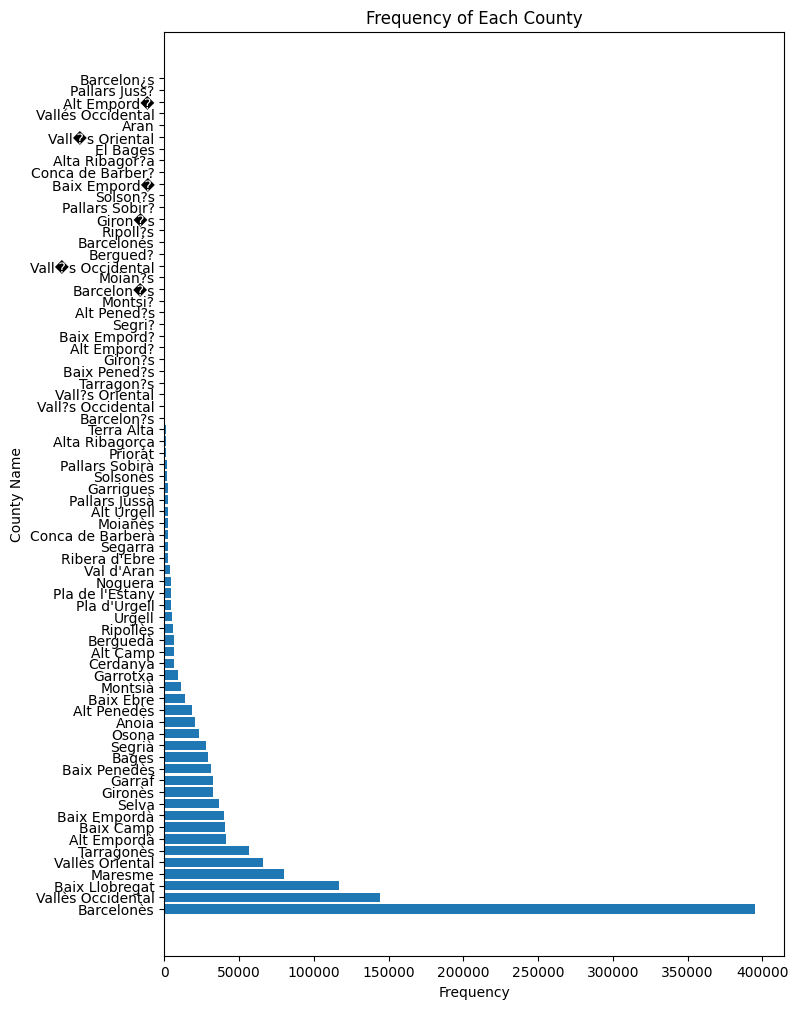

COMARCA
Barcelonès           394946
Vallès Occidental    144516
Baix Llobregat       117042
Maresme               79903
Vallès Oriental       66014
                      ...  
Aran                      1
Vallés Occidental         1
Alt Empord�               1
Pallars Juss?             1
Barcelon¿s                1
Name: count, Length: 72, dtype: int64

In [ ]:
county_counts = df['COMARCA'].value_counts()
plt.figure(figsize=(8,12))
plt.barh(county_counts.index, county_counts.values)
plt.xlabel('Frequency')
plt.ylabel('County Name')
plt.title('Frequency of Each County')
plt.show()
county_counts

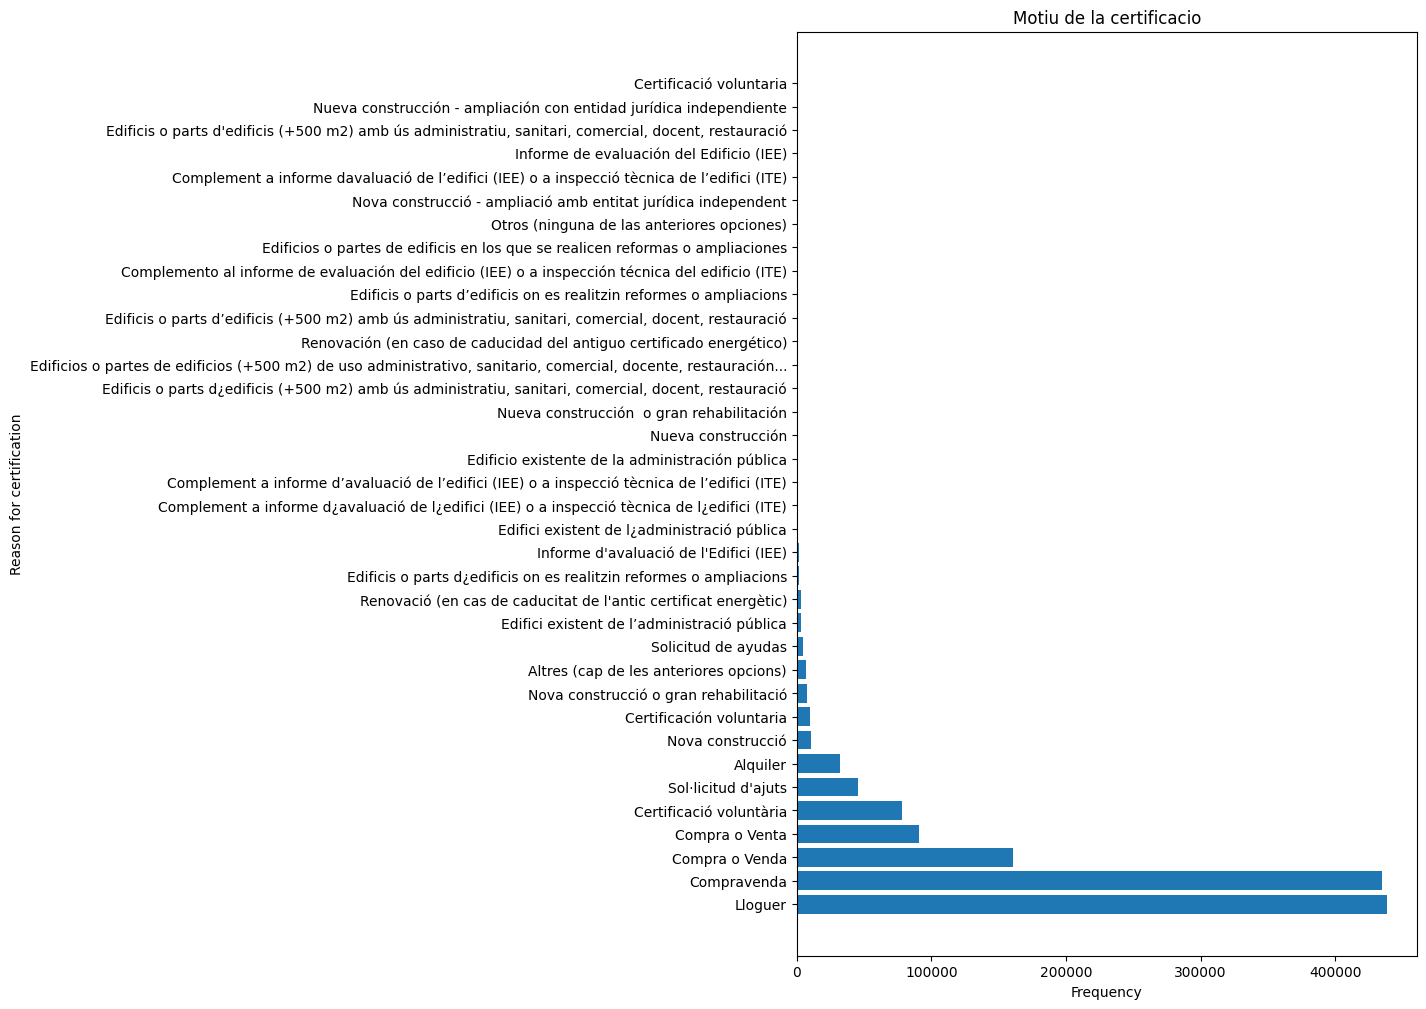

Motiu de la certificacio
Lloguer                                                                                                            438749
Compravenda                                                                                                        434477
Compra o Venda                                                                                                     160844
Compra o Venta                                                                                                      90660
Certificació voluntària                                                                                             77943
Sol·licitud d'ajuts                                                                                                 45250
Alquiler                                                                                                            31803
Nova construcció                                                                                                    10262
Certificación voluntaria                                                                                             9738
Nova construcció o gran rehabilitació                                                                                7419
Altres (cap de les anteriores opcions)                                                                               6827
Solicitud de ayudas                                                                                                  4396
Edifici existent de l’administració pública                                                                          3115
Renovació (en cas de caducitat de l'antic certificat energètic)                                                      2911
Edificis o parts d¿edificis on es realitzin reformes o ampliacions                                                   1959
Informe d'avaluació de l'Edifici (IEE)                                                                               1730
Edifici existent de l¿administració pública                                                                          1149
Complement a informe d¿avaluació de l¿edifici (IEE) o a inspecció tècnica de l¿edifici (ITE)                         1028
Complement a informe d’avaluació de l’edifici (IEE) o a inspecció tècnica de l’edifici (ITE)                         1017
Edificio existente de la administración pública                                                                       895
Nueva construcción                                                                                                    748
Nueva construcción  o gran rehabilitación                                                                             600
Edificis o parts d¿edificis (+500 m2) amb ús administratiu, sanitari, comercial, docent, restauració                  580
Edificios o partes de edificios (+500 m2) de uso administrativo, sanitario, comercial, docente, restauración...       506
Renovación (en caso de caducidad del antiguo certificado energético)                                                  461
Edificis o parts d’edificis (+500 m2) amb ús administratiu, sanitari, comercial, docent, restauració                  316
Edificis o parts d’edificis on es realitzin reformes o ampliacions                                                    278
Complemento al informe de evaluación del edificio (IEE) o a inspección técnica del edificio (ITE)                     277
Edificios o partes de edificis en los que se realicen reformas o ampliaciones                                         268
Otros (ninguna de las anteriores opciones)                                                                            234
Nova construcció - ampliació amb entitat jurídica independent                                                         218
Complement a informe davaluació de l’edifici (IEE) o a inspecció tècnica de l’edifici (ITE)                           112
Informe de evaluación del Edificio (IEE)                               

In [6]:
county_counts = df['Motiu de la certificacio'].value_counts()
plt.figure(figsize=(8,12))
plt.barh(county_counts.index, county_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Reason for certification')
plt.title('Motiu de la certificacio')
plt.show()
county_counts

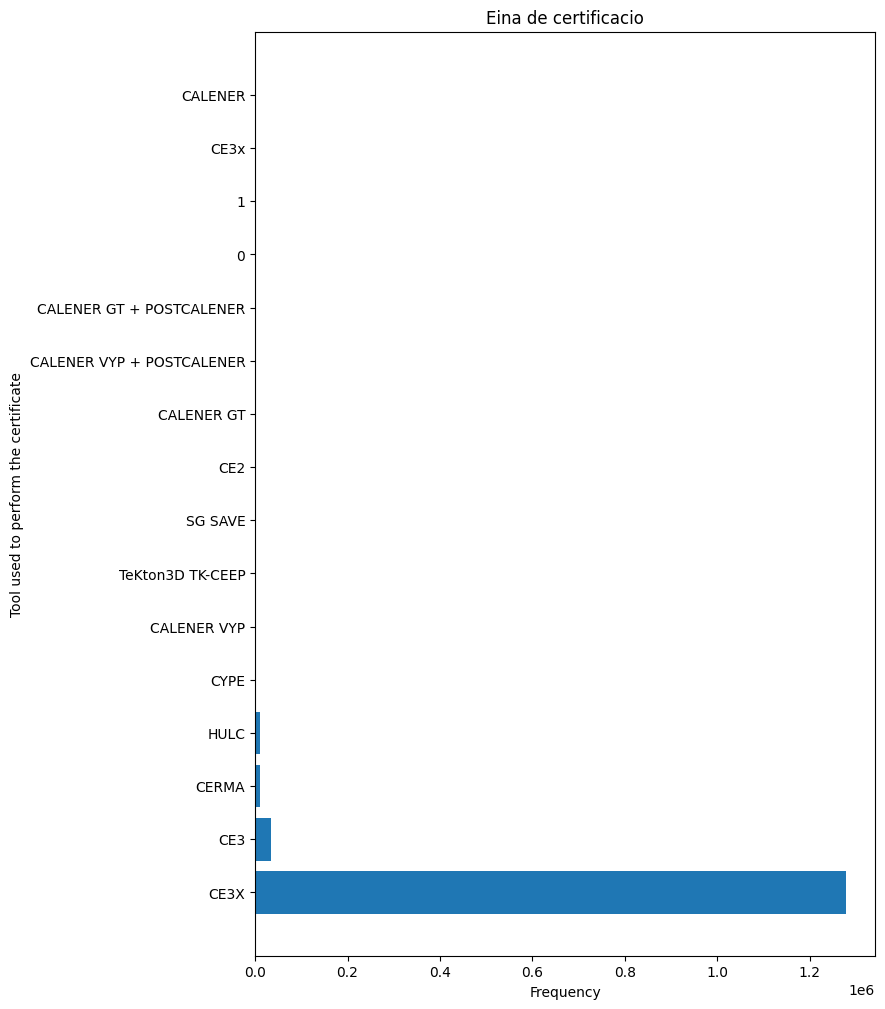

Eina de certificacio
CE3X                         1277040
CE3                            34717
CERMA                          10441
HULC                            9769
CYPE                            2435
CALENER VYP                     1705
TeKton3D TK-CEEP                 265
SG SAVE                          139
CE2                              130
CALENER GT                       119
CALENER VYP + POSTCALENER         92
CALENER GT + POSTCALENER          11
0                                  3
1                                  2
CE3x                               2
CALENER                            1
Name: count, dtype: int64

In [7]:
county_counts = df['Eina de certificacio'].value_counts()
plt.figure(figsize=(8,12))
plt.barh(county_counts.index, county_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Tool used to perform the certificate')
plt.title('Eina de certificacio')
plt.show()
county_counts

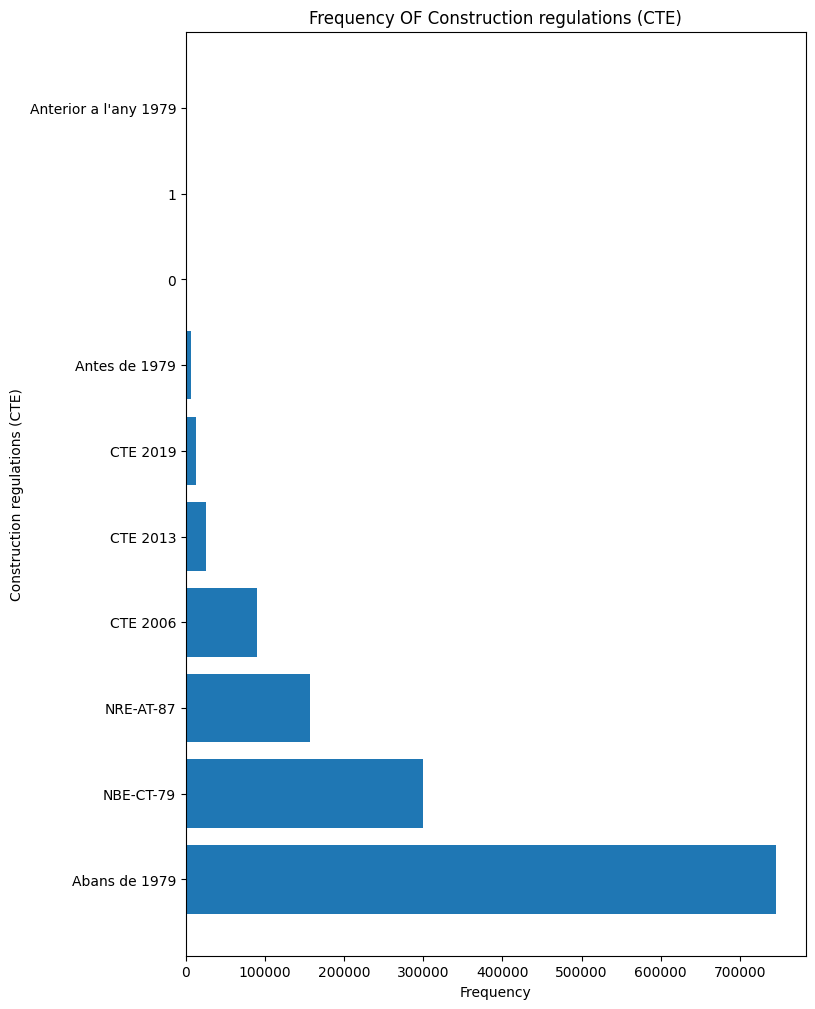

Normativa construcció
Abans de 1979            746289
NBE-CT-79                299164
NRE-AT-87                157000
CTE 2006                  90084
CTE 2013                  25190
CTE 2019                  13017
Antes de 1979              6123
0                             4
1                             1
Anterior a l'any 1979         1
Name: count, dtype: int64

In [ ]:
county_counts = df['Normativa construcció'].value_counts()
plt.figure(figsize=(8,12))
plt.barh(county_counts.index, county_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Construction regulations (CTE)')
plt.title('Normativa construcció')
plt.show()
county_counts

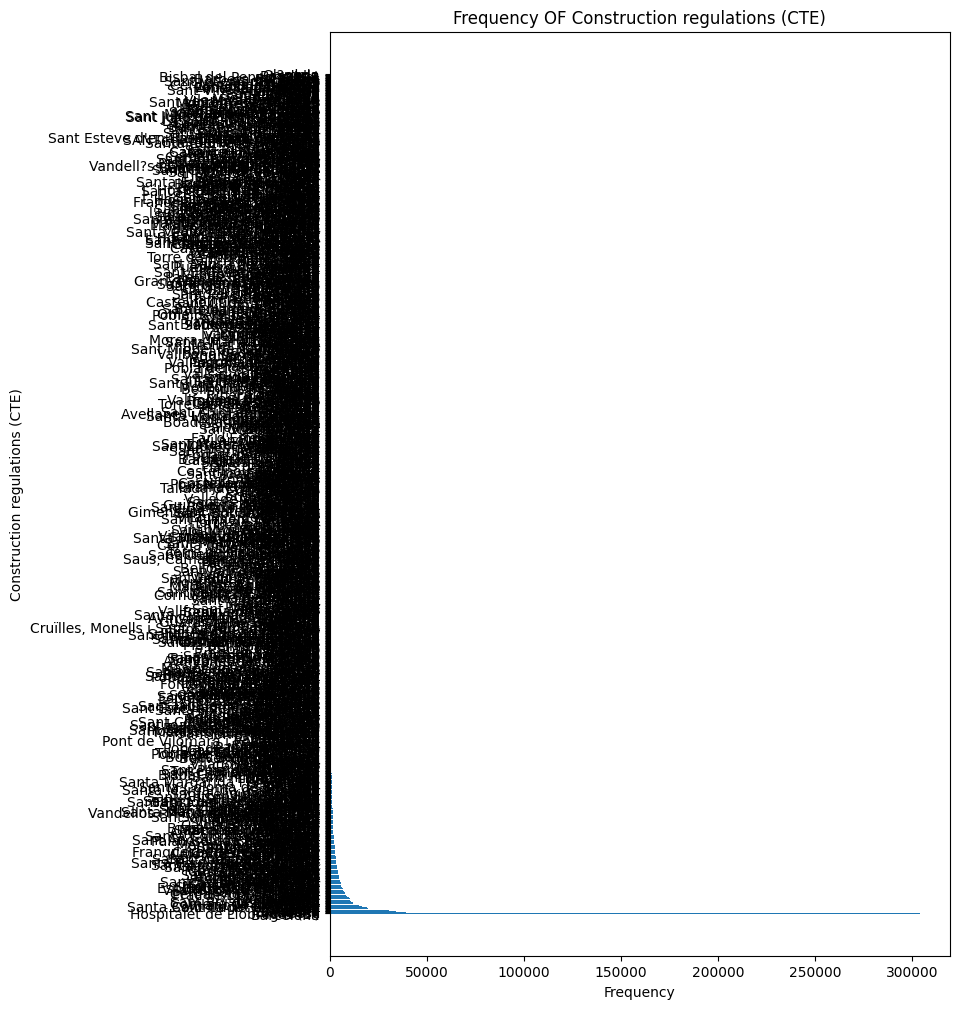

POBLACIO
Barcelona                       304179
Hospitalet de Llobregat (L')     39261
Terrassa                         36604
Sabadell                         33951
Badalona                         30816
                                 ...  
17155                                1
43022                                1
Bisbal del Pened?s (La)              1
Boadella                             1
Ol?rdola                             1
Name: count, Length: 1176, dtype: int64

In [ ]:
county_counts = df['POBLACIO'].value_counts()
plt.figure(figsize=(8,12))
plt.barh(county_counts.index, county_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Construction regulations (CTE)')
plt.title('Frequency OF Construction regulations (CTE)')
plt.show()
county_counts

### Scatter Plots

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336925 entries, 0 to 1336924
Data columns (total 69 columns):
 #   Column                                                  Non-Null Count    Dtype  
---  ------                                                  --------------    -----  
 0   NUM_CAS                                                 1336925 non-null  object 
 1   ADREÇA                                                  1336925 non-null  object 
 2   NUMERO                                                  1336866 non-null  object 
 3   ESCALA                                                  275216 non-null   object 
 4   PIS                                                     1002988 non-null  object 
 5   PORTA                                                   951983 non-null   object 
 6   CODI_POSTAL                                             1336922 non-null  float64
 7   POBLACIO                                                1336925 non-null  object 
 8   COMARCA     

#### CO2

##### df original

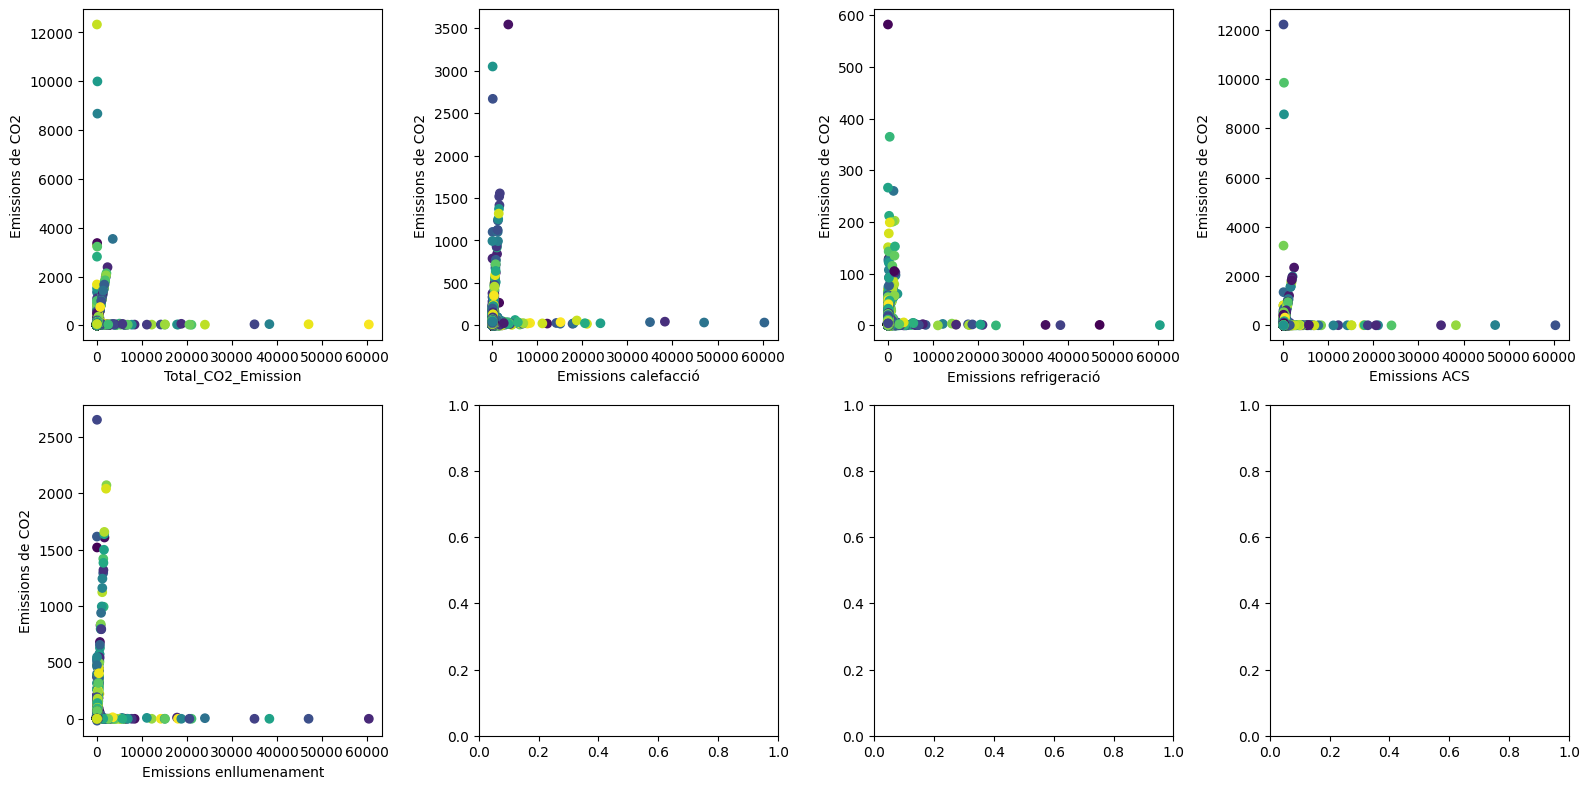

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
eda['Total_CO2_Emission'] = eda['Emissions calefacció'] + eda['Emissions refrigeració'] + eda['Emissions ACS'] + eda['Emissions enllumenament']

# Assuming df is your DataFrame and cols are the columns you want to plot
cols = ['Total_CO2_Emission', 'Emissions calefacció',
 'Emissions refrigeració',
 'Emissions ACS',
 'Emissions enllumenament', ]

plot_index = 0
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for i in range(len(cols)):
    ax = axs[plot_index // 4][plot_index % 4]

    # Plot scatter plot for current pair of features
    ax.scatter(eda['Emissions de CO2'], eda[cols[i]], c=np.random.rand(len(eda)))

    # Set title and labels for clarity
    ax.set_xlabel(cols[i])
    ax.set_ylabel('Emissions de CO2')

    plot_index += 1

plt.tight_layout()
plt.show()


##### preprocessed df

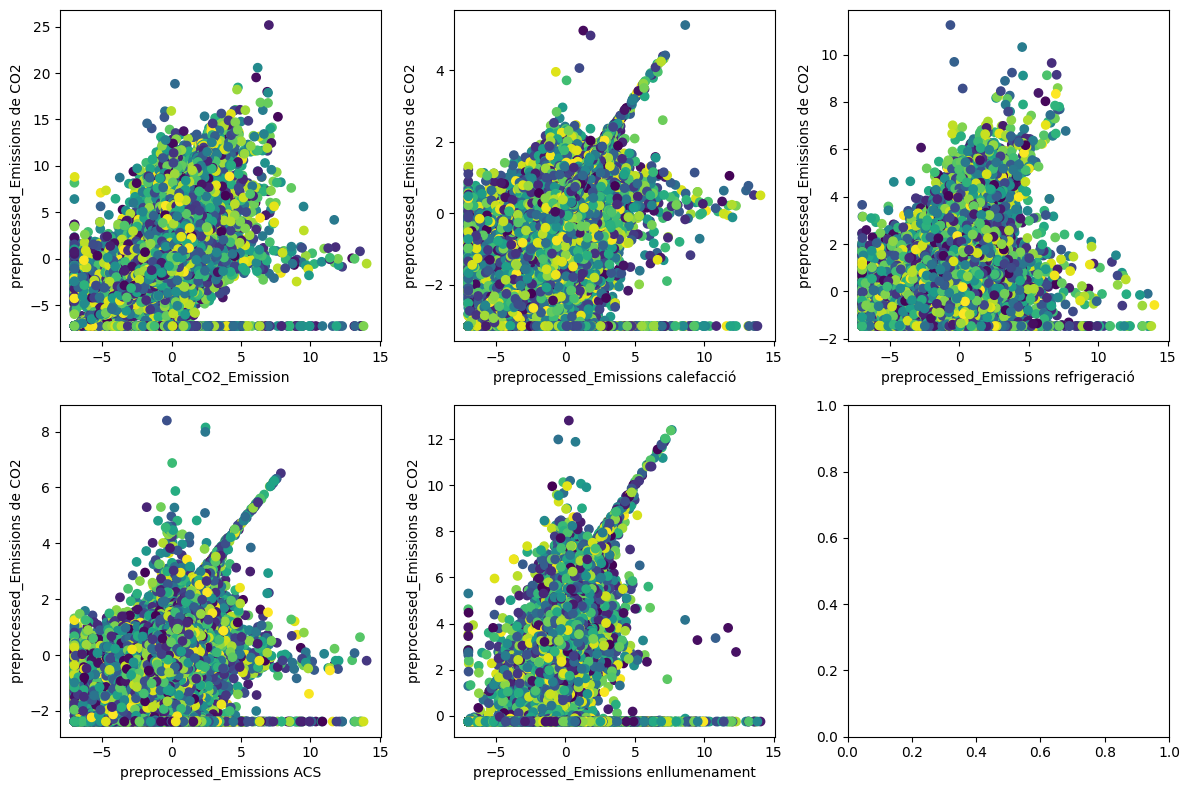

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df['Total_CO2_Emission'] = df['preprocessed_Emissions calefacció'] + df['preprocessed_Emissions refrigeració'] + df['preprocessed_Emissions ACS'] + df['preprocessed_Emissions enllumenament']

# Assuming df is your DataFrame and cols are the columns you want to plot
cols = ['Total_CO2_Emission', 'preprocessed_Emissions calefacció',
 'preprocessed_Emissions refrigeració',
 'preprocessed_Emissions ACS',
 'preprocessed_Emissions enllumenament', ]

plot_index = 0
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i in range(len(cols)):
    ax = axs[plot_index // 3][plot_index % 3]

    # Plot scatter plot for current pair of features
    ax.scatter(df['preprocessed_Emissions de CO2'], df[cols[i]], c=np.random.rand(len(df)))

    # Set title and labels for clarity
    ax.set_xlabel(cols[i])
    ax.set_ylabel('preprocessed_Emissions de CO2')

    plot_index += 1

plt.tight_layout()
plt.show()


#### Energy

original df

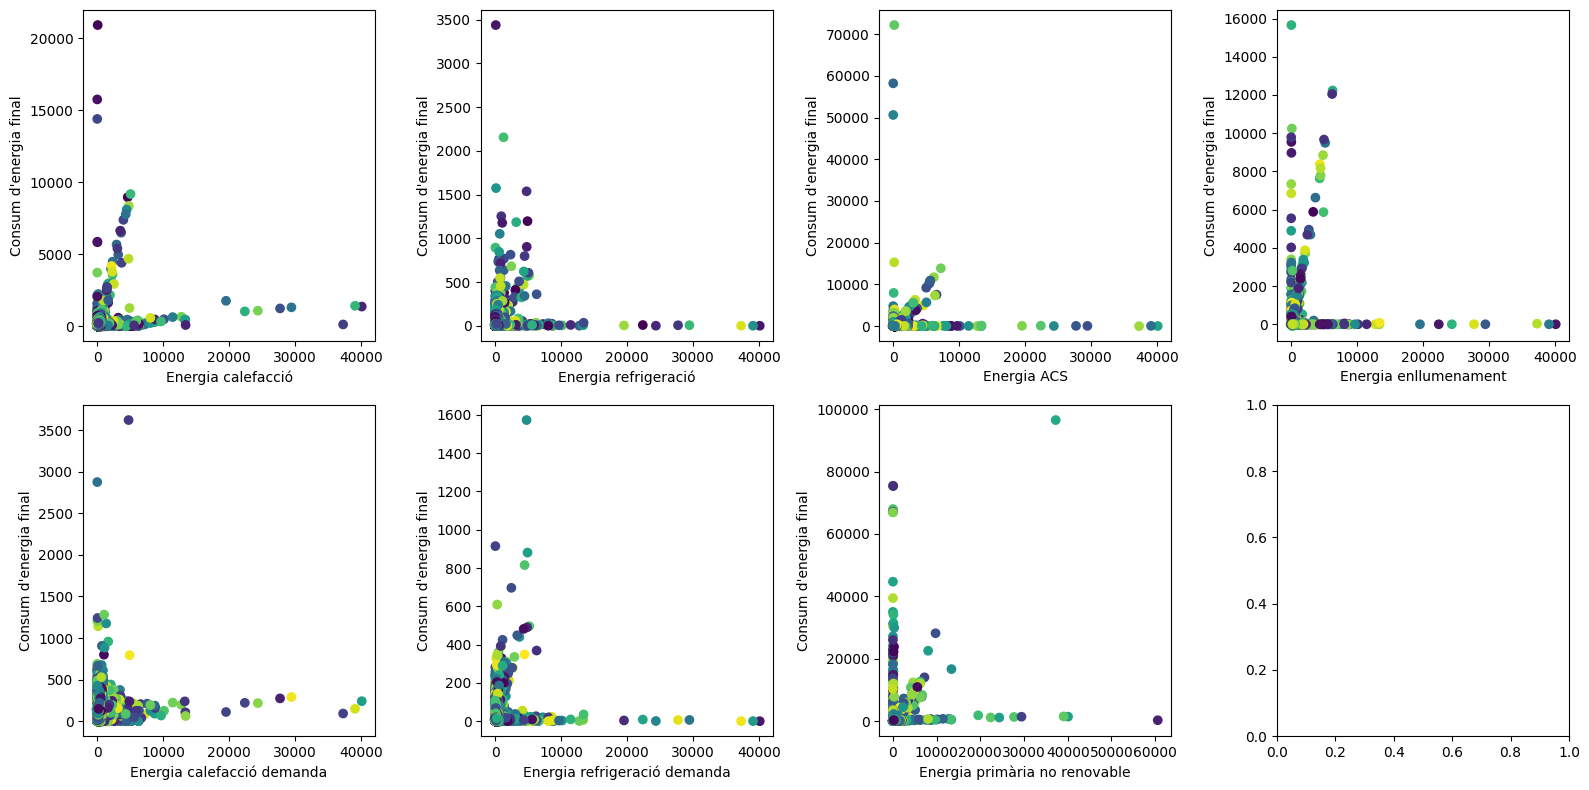

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cols =[ 'Energia calefacció',
 'Energia refrigeració',
 'Energia ACS',
 'Energia enllumenament',
 'Energia calefacció demanda',
 'Energia refrigeració demanda',
 'Energia primària no renovable',]
plot_index = 0
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for i in range(len(cols)):
    ax = axs[plot_index // 4][plot_index % 4]

    # Plot scatter plot for current pair of features
    ax.scatter(eda["Consum d'energia final"], eda[cols[i]], c=np.random.rand(len(eda)))

    # Set title and labels for clarity
    ax.set_xlabel(cols[i])
    ax.set_ylabel("Consum d'energia final")

    plot_index += 1

plt.tight_layout()
plt.show()

preprocessed df

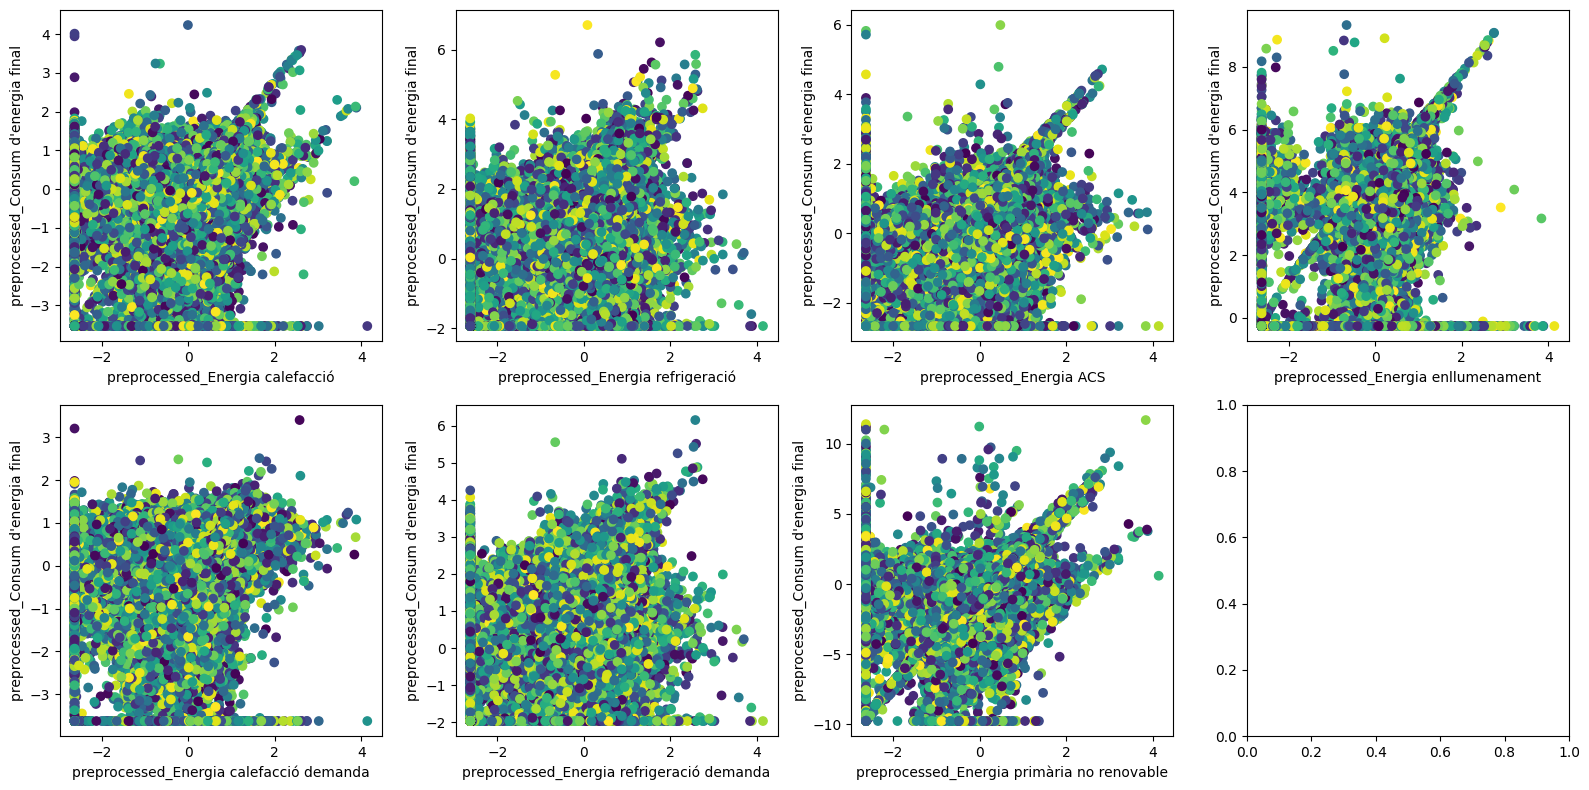

In [ ]:
cols =[ 'preprocessed_Energia calefacció',
 'preprocessed_Energia refrigeració',
 'preprocessed_Energia ACS',
 'preprocessed_Energia enllumenament',
 'preprocessed_Energia calefacció demanda',
 'preprocessed_Energia refrigeració demanda',
 'preprocessed_Energia primària no renovable',

]
plot_index = 0
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for i in range(len(cols)):
    ax = axs[plot_index // 4][plot_index % 4]

    # Plot scatter plot for current pair of features
    ax.scatter(df["preprocessed_Consum d'energia final"], df[cols[i]], c=np.random.rand(len(df)))

    # Set title and labels for clarity
    ax.set_xlabel(cols[i])
    ax.set_ylabel("preprocessed_Consum d'energia final")

    plot_index += 1

plt.tight_layout()
plt.show()

In [ ]:
cols = [
    'preprocessed_Energia calefacció',
    'preprocessed_Energia refrigeració',
    'preprocessed_Energia ACS',
    'preprocessed_Energia enllumenament'
]

# Check if all columns exist and have correct lengths
for col in cols:
    print(f"{col}: {len(eda[col])}")

# Perform addition using vectorized operations
eda['Total_Energy_Consumption'] = eda[cols].sum(axis=1)

preprocessed_Energia calefacció: 1336925
preprocessed_Energia refrigeració: 1336925
preprocessed_Energia ACS: 1336925
preprocessed_Energia enllumenament: 1336925


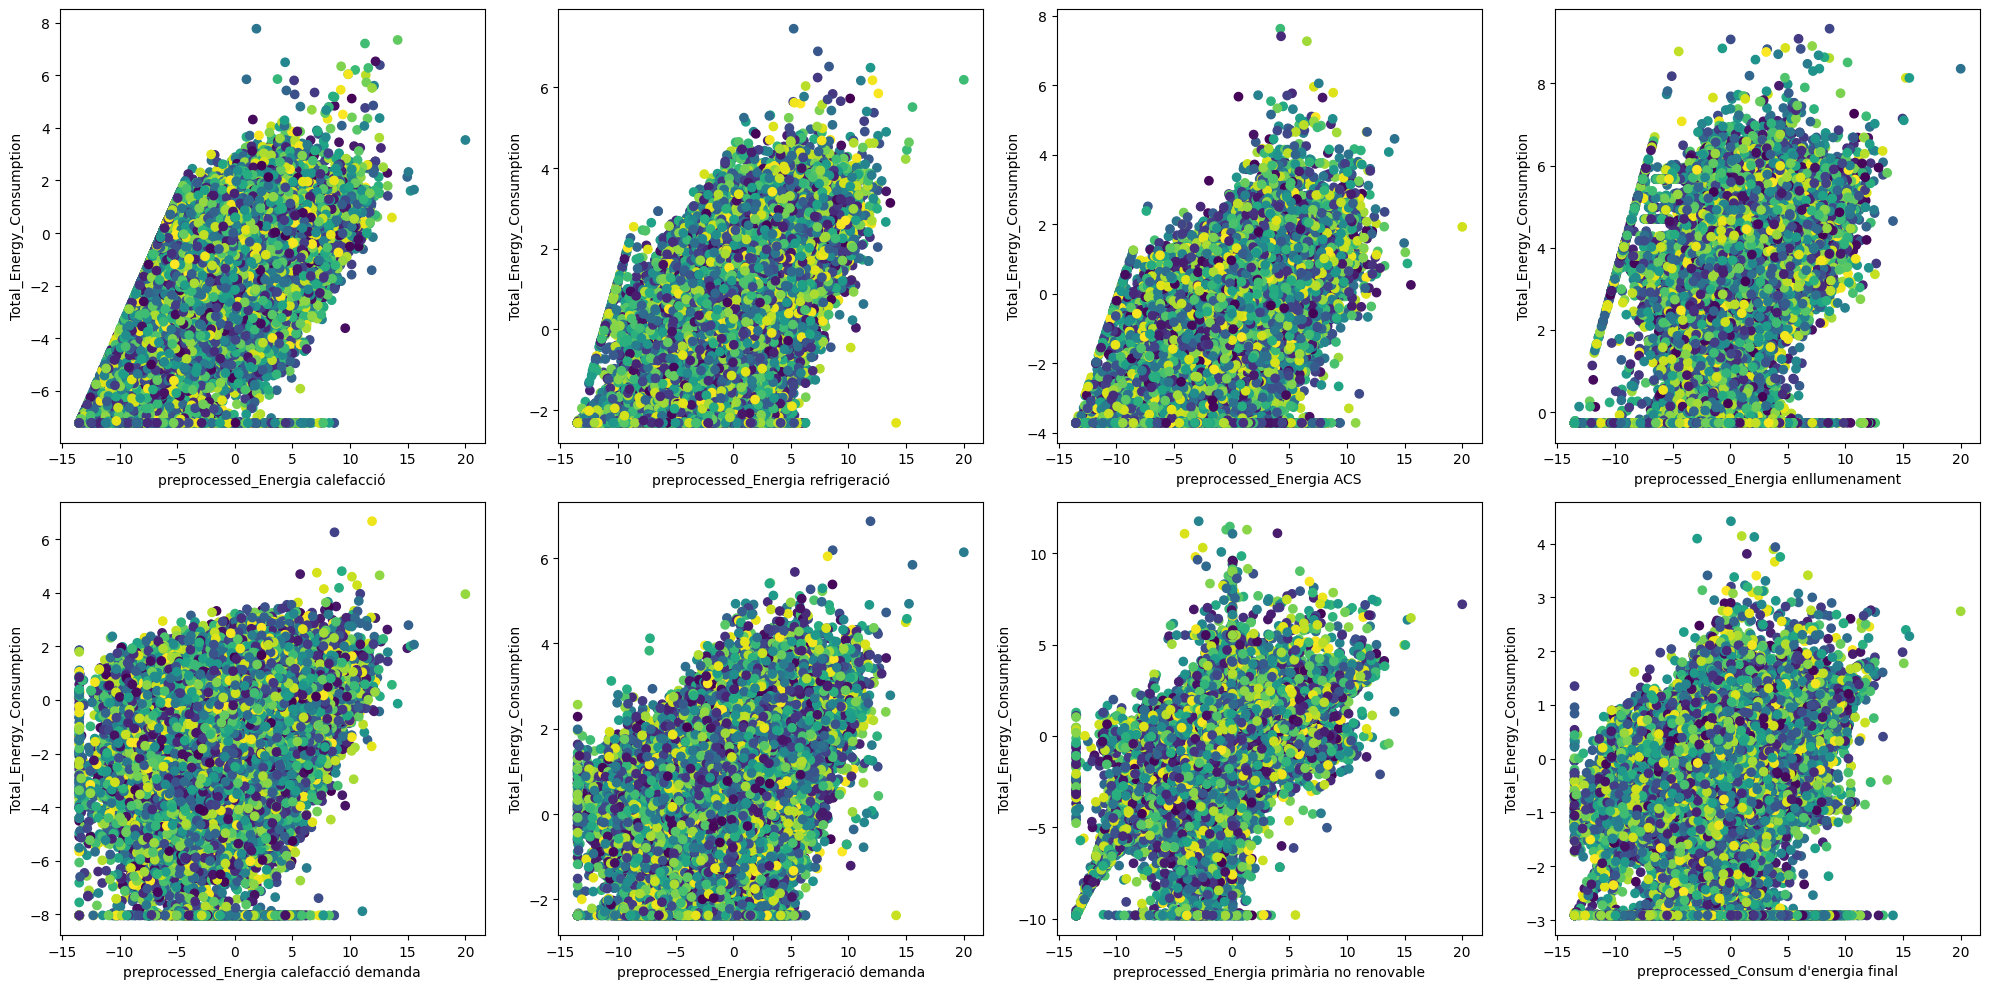

In [ ]:

cols =[ 'preprocessed_Energia calefacció',
 'preprocessed_Energia refrigeració',
 'preprocessed_Energia ACS',
 'preprocessed_Energia enllumenament',
 'preprocessed_Energia calefacció demanda',
 'preprocessed_Energia refrigeració demanda',
 'preprocessed_Energia primària no renovable',
 "preprocessed_Consum d'energia final",
]
plot_index = 0
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i in range(len(cols)):
    ax = axs[plot_index // 4][plot_index % 4]

    # Plot scatter plot for current pair of features
    ax.scatter(pr_df['Total_Energy_Consumption'], pr_df[cols[i]], c=np.random.rand(len(pr_df)))

    # Set title and labels for clarity
    ax.set_xlabel(cols[i])
    ax.set_ylabel('Total_Energy_Consumption')

    plot_index += 1

plt.tight_layout()
plt.show()


### Targets

In [ ]:
df.columns.tolist()

['NUM_CAS',
 'ADREÇA',
 'NUMERO',
 'ESCALA',
 'PIS',
 'PORTA',
 'CODI_POSTAL',
 'POBLACIO',
 'COMARCA',
 'CODI_POBLACIO',
 'CODI_COMARCA',
 'CODI_PROVINCIA',
 'REFERENCIA CADASTRAL',
 'METRES_CADASTRE',
 'ANY_CONSTRUCCIO',
 'Energia primària no renovable',
 'Emissions de CO2',
 "Consum d'energia final",
 "Cost anual aproximat d'energia per habitatge",
 'SOLAR TERMICA',
 'SOLAR FOTOVOLTAICA',
 'INFORME_INS_TECNICA_EDIFICI',
 'Eina de certificacio',
 'VALOR AILLAMENTS',
 'VALOR FINESTRES',
 'Motiu de la certificacio',
 'VALOR AILLAMENTS CTE',
 'VALOR FINESTRES CTE',
 'UTM_X',
 'UTM_Y',
 'Normativa construcció',
 'Emissions calefacció',
 'Emissions refrigeració',
 'Emissions ACS',
 'Emissions enllumenament',
 'Energia calefacció',
 'Energia refrigeració',
 'Energia ACS',
 'Energia enllumenament',
 'Energia calefacció demanda',
 'Energia refrigeració demanda',
 'VENTILACIO US RESIDENCIAL',
 'LONGITUD',
 'LATITUD',
 'GEOREFERÈNCIA',
 'ACTUACIONS_REHABILITACIO',
 'DATA_ENTRADA',
 "Consum d'e

In [ ]:
encols = [
    'preprocessed_Energia calefacció',
    'preprocessed_Energia refrigeració',
    'preprocessed_Energia ACS',
    'preprocessed_Energia enllumenament'
]
df['pp_total_energy']= df[encols].sum(axis=1)
emcols = [
    'preprocessed_Emissions calefacció',
    'preprocessed_Emissions refrigeració',
    'preprocessed_Emissions ACS',
    'preprocessed_Emissions enllumenament'
]
df['pp_total_Emissions']= df[emcols].sum(axis=1)
# "preprocessed_Cost anual aproximat d'energia per habitatge"

cols = [
'pp_total_energy',
'pp_total_Emissions',
 'heating_efficiency',
 'cooling_efficiency',
 'ac_efficiency',
 'Insulation Performance Index',
  'Energia primària no renovable',
 'Emissions de CO2',
 "Consum d'energia final",
 'Renewable_Energy_Score',
 'preprocessed_Energia primària no renovable',
 'preprocessed_Emissions de CO2',
 "preprocessed_Consum d'energia final",
 'preprocessed_VALOR AILLAMENTS',
 'preprocessed_VALOR FINESTRES',
 'preprocessed_Energia calefacció demanda',
 'preprocessed_Energia refrigeració demanda',

 'preprocessed_Renewable_Energy_Score',
 'age',
 'preprocessed_heating_efficiency',
 'preprocessed_cooling_efficiency',
 'preprocessed_ac_efficiency',
 'preprocessed_Insulation Performance Index',
 "ENCODED Qualificació de consum d'energia primaria no renovable",
 "ENCODED Qualificacio d'emissions de CO2",
 'ENCODED Qualificació emissions calefacció',
 'ENCODED Qualificació emissions refrigeració',
 'ENCODED Qualificació emissions ACS',
 'ENCODED Qualificació energia calefacció',
 'ENCODED Qualificació energia enllumenament',
 'ENCODED Qualificació emissions enllumenament',
 'ENCODED Qualificació energia refrigeració',
 'ENCODED Qualificació energia ACS',
 'ENCODED Qualificació energia calefacció demanda',
 'ENCODED Qualificació energia refrigeració demanda',
 'ENCODED ZONA CLIMATICA',
 'NOM_PROVINCIA_Barcelona',
 'NOM_PROVINCIA_Girona',
 'NOM_PROVINCIA_Lleida',
 'NOM_PROVINCIA_Tarragona',
 'VEHICLE ELECTRIC_NO',
 'VEHICLE ELECTRIC_SI',
 'VEHICLE ELECTRIC_other',
 'SISTEMA BIOMASSA_other',
 'XARXA DISTRICTE_NO',
 'XARXA DISTRICTE_SI',
 'XARXA DISTRICTE_other',
 'ENERGIA GEOTERMICA_other',
 'REHABILITACIO_ENERGETICA_NO',
 'REHABILITACIO_ENERGETICA_SI',
 'REHABILITACIO_ENERGETICA_other',
 'Tipus Tramit_Edificis acabats',
 'Tipus Tramit_Edificis existents',
 'Tipus Tramit_Edificis existents acabats',
 'TIPUS_TERCIARI_Altres',
 'TIPUS_TERCIARI_Comercial',
 'TIPUS_TERCIARI_Comercio',
 'TIPUS_TERCIARI_Comerç',
 'TIPUS_TERCIARI_Cultural',
 'TIPUS_TERCIARI_Deportivo',
 'TIPUS_TERCIARI_Educació',
 'TIPUS_TERCIARI_Educación',
 'TIPUS_TERCIARI_Esportiu',
 'TIPUS_TERCIARI_Hotel',
 'TIPUS_TERCIARI_Local',
 'TIPUS_TERCIARI_Oficinas',
 'TIPUS_TERCIARI_Oficinas en edificio industrial',
 'TIPUS_TERCIARI_Oficines',
 'TIPUS_TERCIARI_Oficines en edifici industrial',
 'TIPUS_TERCIARI_Otros',
 'TIPUS_TERCIARI_Restauració',
 'TIPUS_TERCIARI_Restauración',
 'TIPUS_TERCIARI_Sanidad',
 'TIPUS_TERCIARI_Sanitat',
 'TIPUS_TERCIARI_other',
 "US_EDIFICI_Bloc d'habitatges",
 "US_EDIFICI_Bloc d'habitatges plurifamiliar",
 'US_EDIFICI_Bloque de viviendas',
 'US_EDIFICI_Bloque de viviendas plurifamiliar',
 'US_EDIFICI_Habitatge Unifamiliar',
 "US_EDIFICI_Habitatge individual en bloc d'habitatges",
 'US_EDIFICI_Habitatge unifamiliar',
 'US_EDIFICI_Terciari',
 'US_EDIFICI_Terciario',
 'US_EDIFICI_Vivienda individual en bloque de viviendas',
 'US_EDIFICI_Vivienda unifamiliar',
 'FR_Encoded_COMARCA',
 'FR_Encoded_Normativa construcció',
 'FR_Encoded_Motiu de la certificacio',
 'FR_Encoded_Eina de certificacio',
 'FR_Encoded_VALOR AILLAMENTS CTE',
 'FR_Encoded_VALOR FINESTRES CTE']




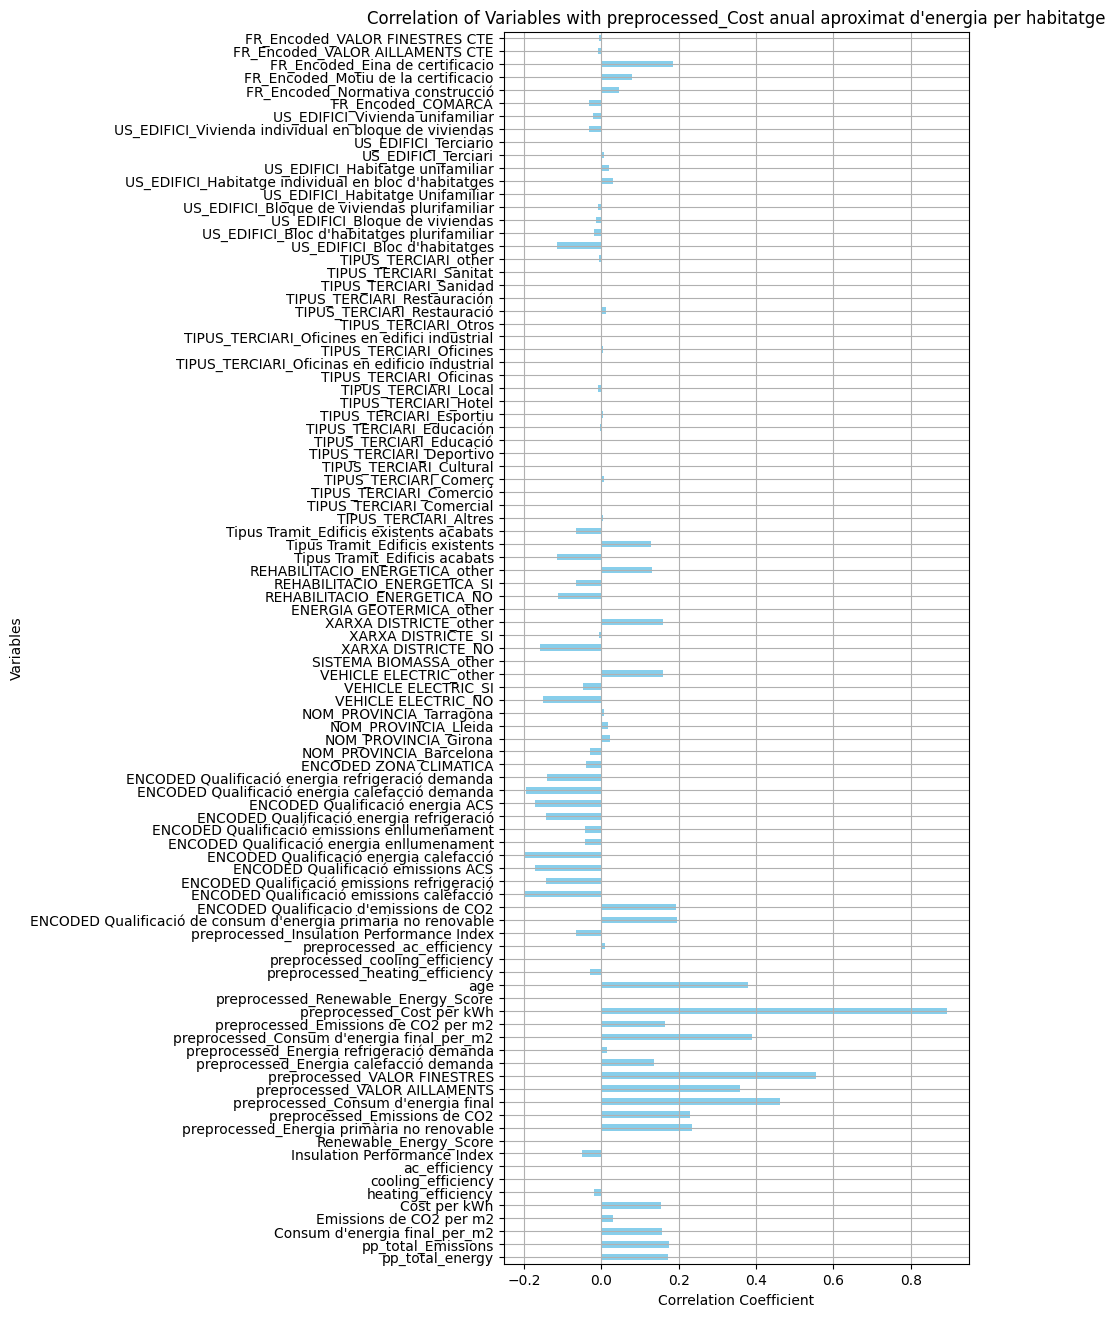

In [ ]:
# Calculate the correlation of all columns with 'FedFundsRate'
correlations = df[cols].corr()[ "preprocessed_Cost anual aproximat d'energia per habitatge"]

# Create a plot for each correlation
plt.figure(figsize=(6, 16))
correlations.drop( "preprocessed_Cost anual aproximat d'energia per habitatge").plot(kind='barh', color='skyblue')

# Customize the plot
plt.title("Correlation of Variables with preprocessed_Cost anual aproximat d'energia per habitatge" )
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)

# Show the plot
plt.show()

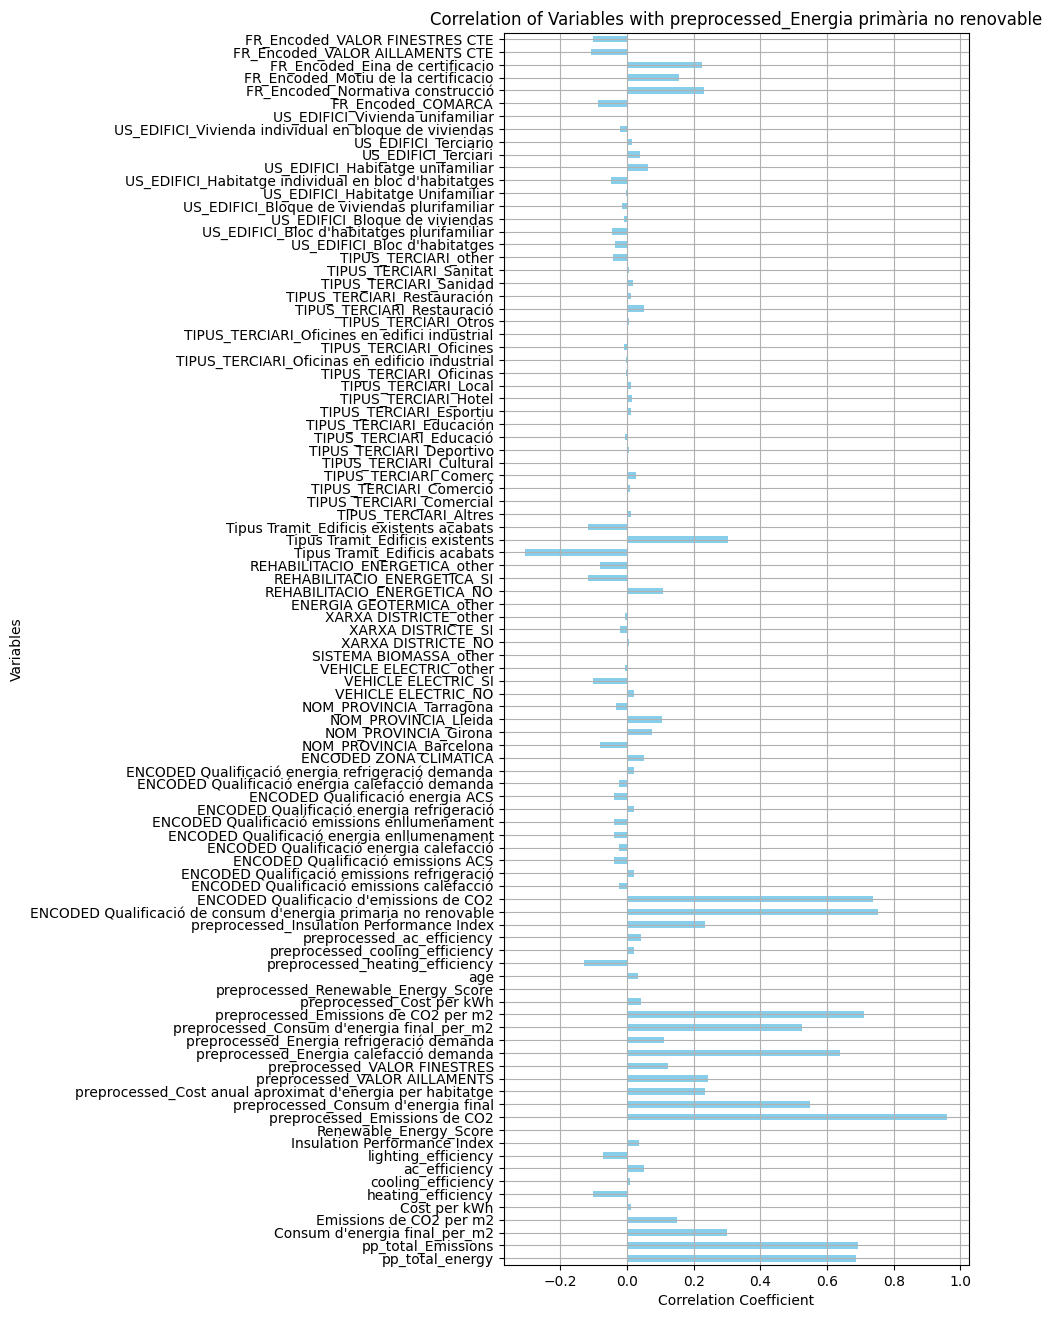

In [ ]:
correlations = df[cols].corr()['preprocessed_Energia primària no renovable']

# Create a plot for each correlation
plt.figure(figsize=(6, 16))
correlations.drop("preprocessed_Energia primària no renovable" ).plot(kind='barh', color='skyblue')

# Customize the plot
plt.title("Correlation of Variables with preprocessed_Energia primària no renovable" )
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)

# Show the plot
plt.show()

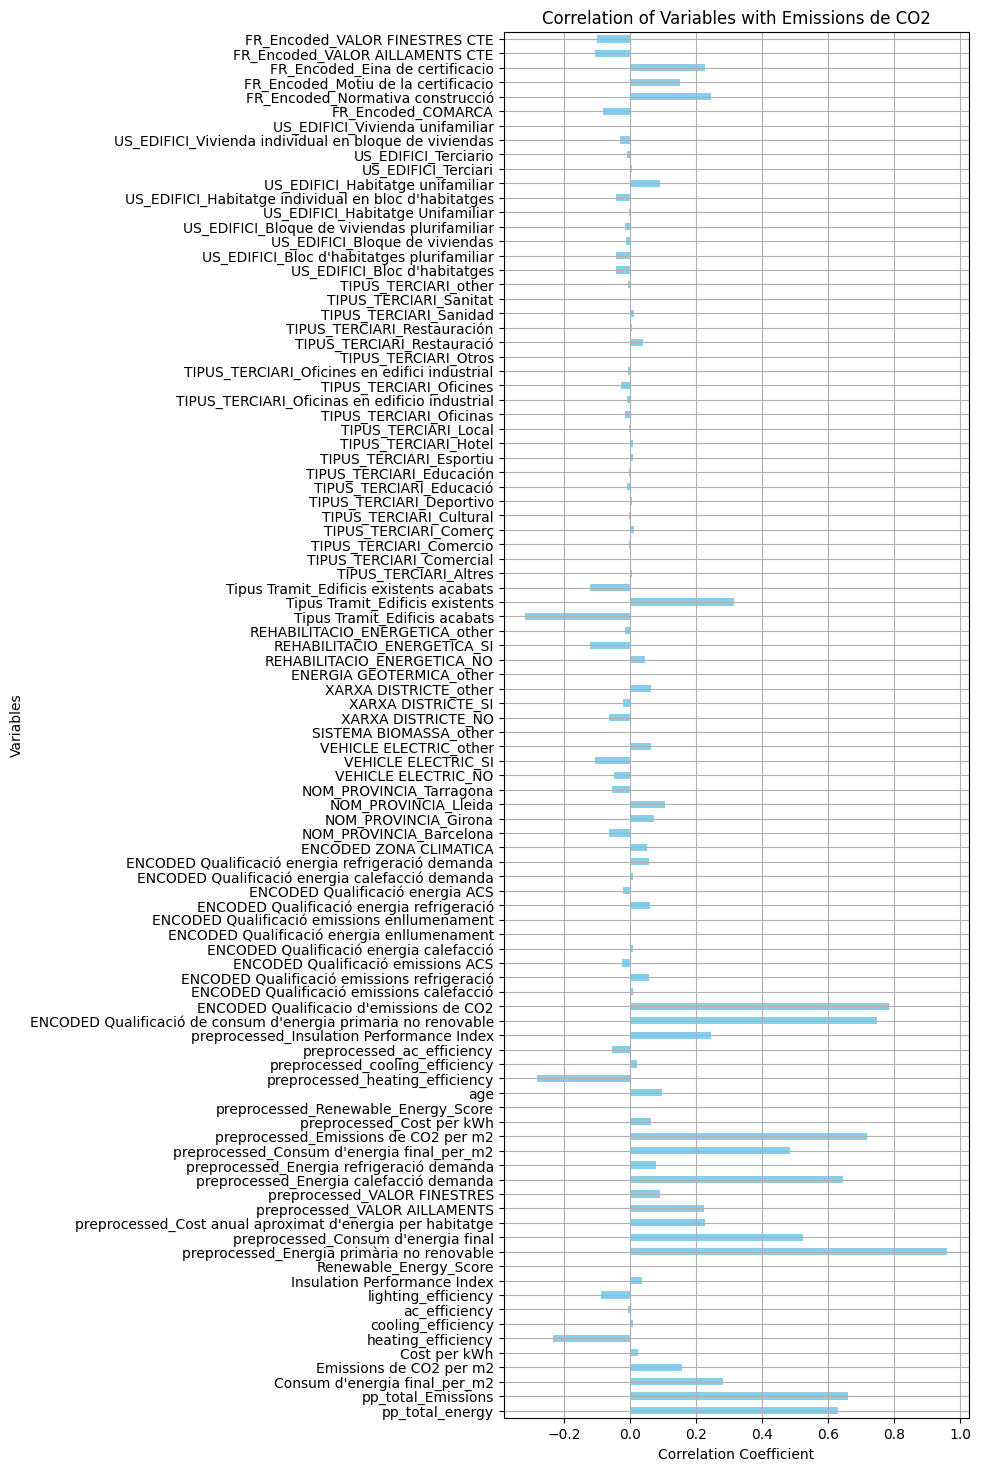

In [ ]:
correlations = df[cols].corr()['preprocessed_Emissions de CO2' ]

# Create a plot for each correlation
plt.figure(figsize=(6, 18))
correlations.drop('preprocessed_Emissions de CO2' ).plot(kind='barh', color='skyblue')

# Customize the plot
plt.title("Correlation of Variables with Emissions de CO2" )
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)

# Show the plot
plt.show()

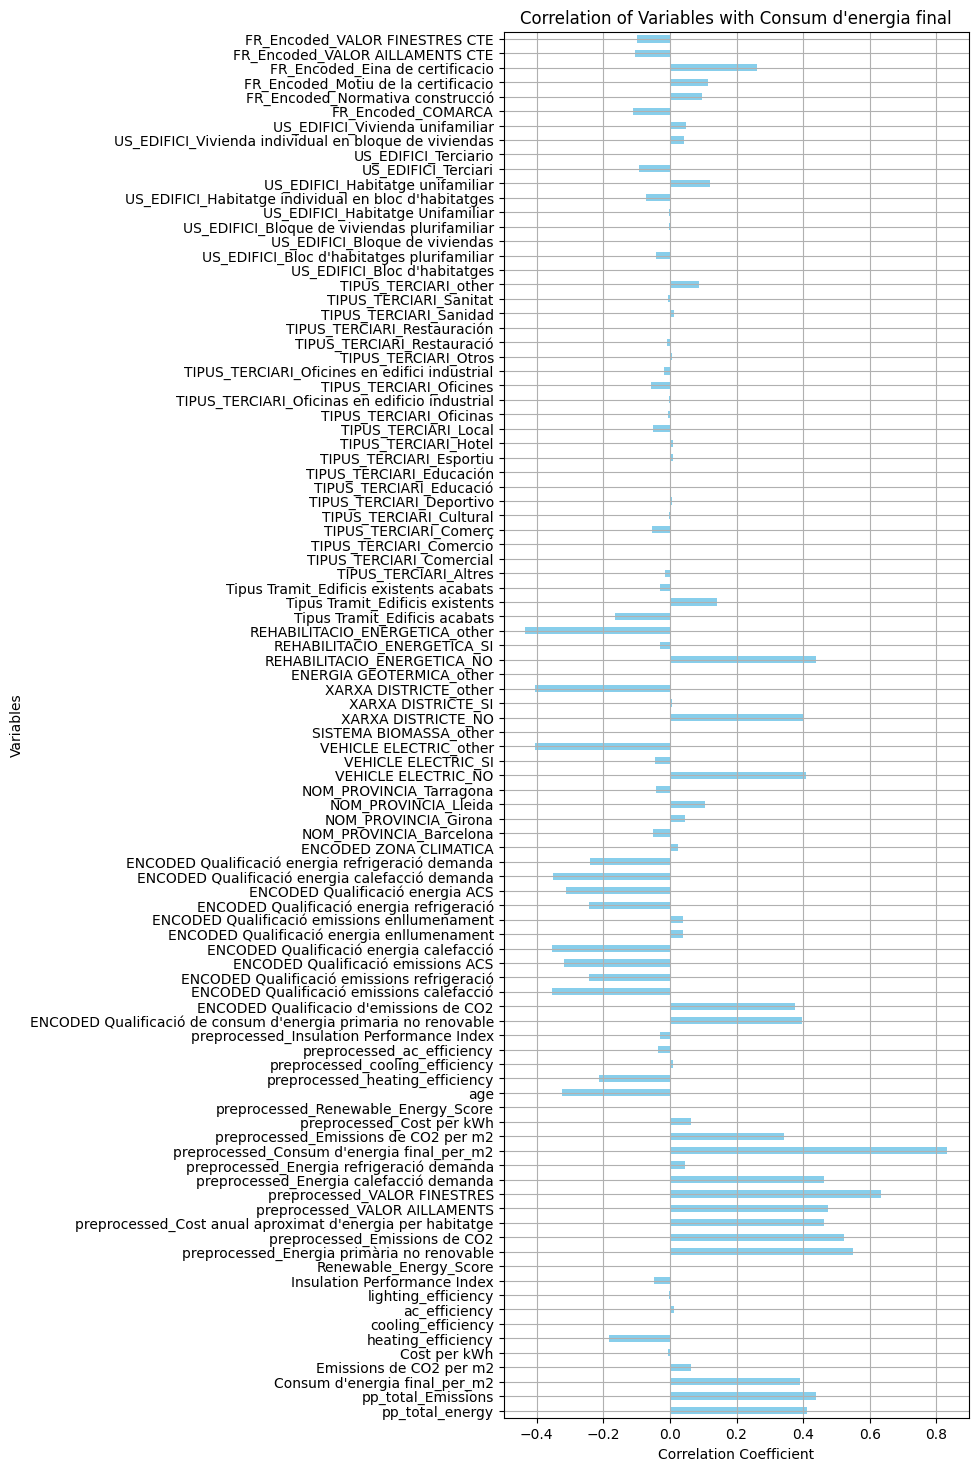

In [ ]:
correlations = df[cols].corr()["preprocessed_Consum d'energia final" ]
'preprocessed_Energia primària no renovable'
# Create a plot for each correlation
plt.figure(figsize=(6, 18))
correlations.drop("preprocessed_Consum d'energia final" ).plot(kind='barh', color='skyblue')

# Customize the plot
plt.title("Correlation of Variables with Consum d'energia final" )
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)

# Show the plot
plt.show()

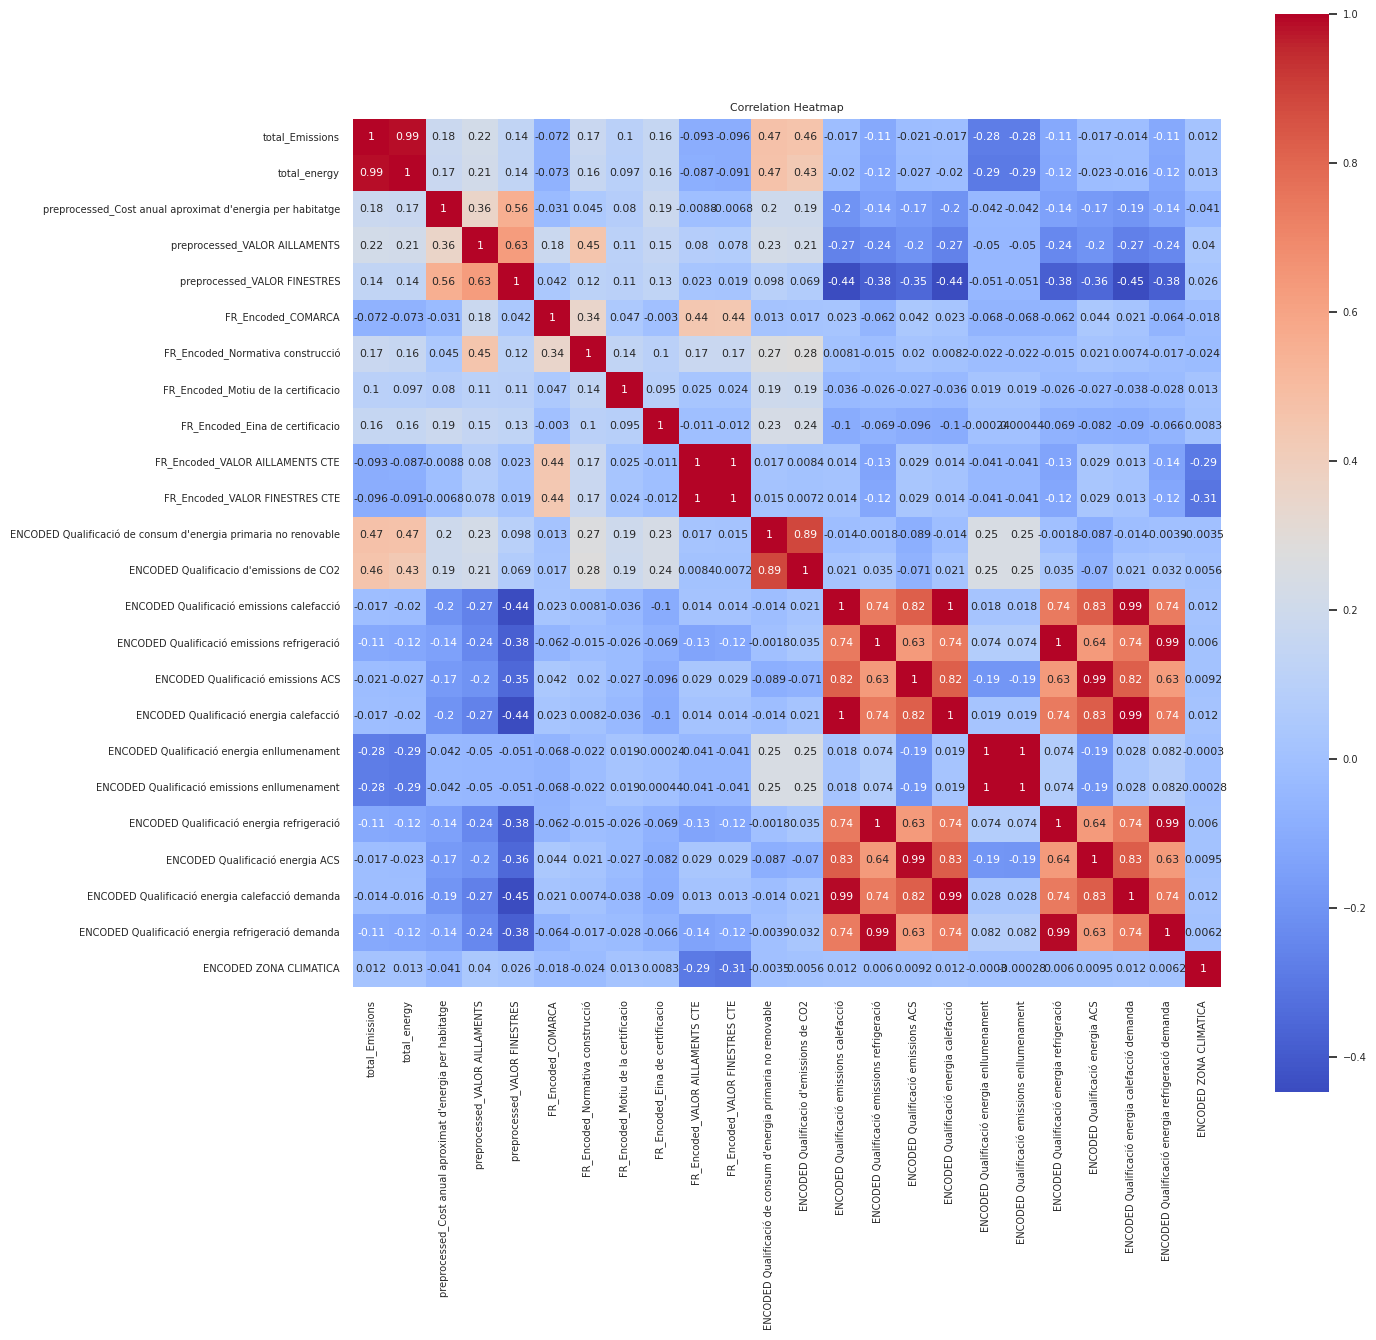

In [ ]:


cols = [
        'total_Emissions',
        'total_energy',
        "preprocessed_Cost anual aproximat d'energia per habitatge" ,
        'preprocessed_VALOR AILLAMENTS',
        'preprocessed_VALOR FINESTRES',
        'FR_Encoded_COMARCA',
        'FR_Encoded_Normativa construcció',
        'FR_Encoded_Motiu de la certificacio',
        'FR_Encoded_Eina de certificacio',
        'FR_Encoded_VALOR AILLAMENTS CTE',
        'FR_Encoded_VALOR FINESTRES CTE',
        "ENCODED Qualificació de consum d'energia primaria no renovable",
        "ENCODED Qualificacio d'emissions de CO2",
        'ENCODED Qualificació emissions calefacció',
        'ENCODED Qualificació emissions refrigeració',
        'ENCODED Qualificació emissions ACS',
        'ENCODED Qualificació energia calefacció',
        'ENCODED Qualificació energia enllumenament',
        'ENCODED Qualificació emissions enllumenament',
        'ENCODED Qualificació energia refrigeració',
        'ENCODED Qualificació energia ACS',
        'ENCODED Qualificació energia calefacció demanda',
        'ENCODED Qualificació energia refrigeració demanda',
        'ENCODED ZONA CLIMATICA']

corr_matrix = pr_df[cols].corr()
plt.figure(figsize=(14, 14))
sns.set(font_scale=.65)
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', square=True, )
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df = df[cols]
df.to_csv('small_model_prepared.csv', index=False)